#Bayes' Theorem:
Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
The formula for Bayes' theorem is given as:
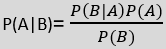

Where,

P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.

P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a hypothesis is true.

P(A) is Prior Probability: Probability of hypothesis before observing the evidence.

P(B) is Marginal Probability: Probability of Evidence.


Working of Naïve Bayes' Classifier:
Working of Naïve Bayes' Classifier can be understood with the help of the below example:

Suppose we have a dataset of weather conditions and corresponding target variable "Play". So using this dataset we need to decide that whether we should play or not on a particular day according to the weather conditions. So to solve this problem, we need to follow the below steps:

Convert the given dataset into frequency tables.

Generate Likelihood table by finding the probabilities of given features.$P(X=x_0|Y)$

Now, use Bayes theorem to calculate the posterior probability.

$P(Y=j|X=x_0) = \frac{P(X=x_0|Y=j).P(Y=j)}{P(X=x_0)}$

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Importing the libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
# Importing the dataset
path = '/content/drive/MyDrive/Colab Notebooks/Summer_School/User_Data.csv'
dataset = pd.read_csv(path)  
x = dataset.iloc[:,[ 2,3]].values  
y = dataset.iloc[:, 4].values  
  
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
  
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

#Fitting Naive Bayes to the Training Set:
After the pre-processing step, now we will fit the Naive Bayes model to the Training set. Below is the code for it:

In [ ]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

#Prediction of the test set result:

In [ ]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)

import torch
xx = torch.tensor(x_test)#.view(len(y_pred))
yy = torch.tensor(y_test).reshape(len(y_pred),1)
yy_pred = torch.tensor(y_pred).reshape(len(y_pred),1)

torch.cat((xx,yy,yy_pred),axis=1)

tensor([[ 1.0298, -1.1119,  1.0000,  1.0000],
        [-0.8000,  0.3770,  0.0000,  0.0000],
        [-1.0889, -1.6182,  0.0000,  0.0000],
        [ 0.0668, -0.6057,  0.0000,  0.0000],
        [ 1.9929,  0.7343,  1.0000,  1.0000],
        [ 1.3187, -1.4097,  1.0000,  1.0000],
        [-0.7037,  1.9255,  1.0000,  1.0000],
        [-0.5111,  1.3895,  1.0000,  0.0000],
        [ 0.4520,  0.5854,  1.0000,  1.0000],
        [ 0.0668,  0.0197,  0.0000,  0.0000],
        [-0.1258,  0.1388,  0.0000,  0.0000],
        [ 0.2594,  1.0917,  1.0000,  1.0000],
        [-1.2815, -1.5288,  0.0000,  0.0000],
        [-0.2221, -0.9333,  0.0000,  0.0000],
        [-1.1852,  0.5854,  0.0000,  0.0000],
        [-0.3185, -1.3502,  0.0000,  0.0000],
        [-0.9926, -1.4990,  0.0000,  0.0000],
        [-1.6667,  0.3472,  0.0000,  0.0000],
        [-1.7630,  0.4366,  0.0000,  0.0000],
        [-0.2221, -1.4990,  0.0000,  0.0000],
        [-0.6074, -0.0697,  0.0000,  0.0000],
        [ 0.0668, -0.1590,  0.0000

#Creating Confusion Matrix:
Now we will check the accuracy of the Naive Bayes classifier using the Confusion matrix. Below is the code for it:

In [ ]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

#Visualizing the training set result:
Next we will visualize the training set result using Naïve Bayes Classifier. Below is the code for it:

<ipython-input-9-5db456a14365>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


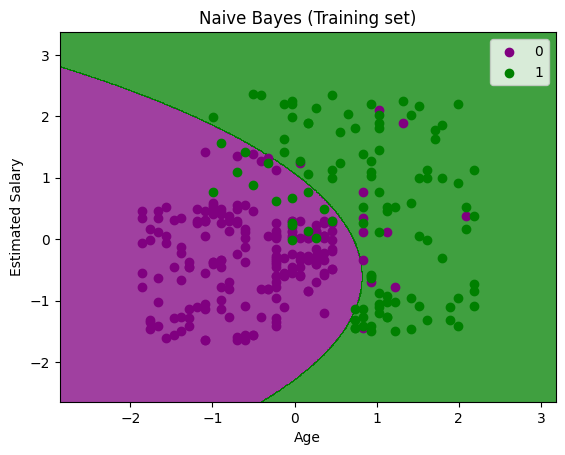

In [ ]:
# Visualising the Training set results  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

#Visualizing the Test set result:

<ipython-input-10-b28789e06ddb>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


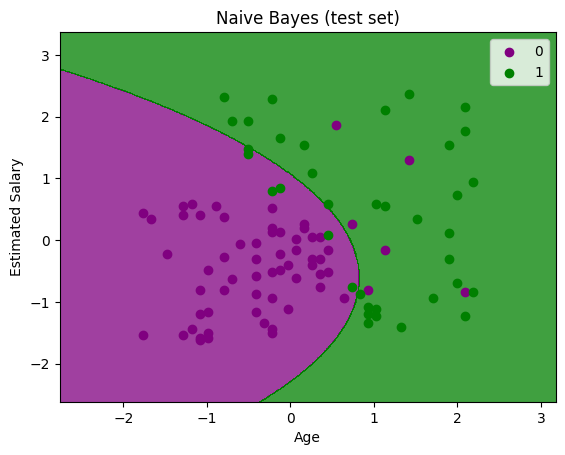

In [ ]:
# Visualising the Test set results  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show() 